In [1]:
import pandas as pd

# Load the dataset 
data = pd.read_excel('Gen Z Expansion.xlsx')

# Convert 'Date' to datetime format
data['Timeline'] = pd.to_datetime(data['Timeline'])

# Check for missing values
missing_values = data.isnull().sum()

# Descriptive statistics to identify outliers
descriptive_stats = data.head()

missing_values, descriptive_stats


(Timeline                 0
 Mall Name                0
 Leased Square Footage    0
 Monthly Sales            0
 dtype: int64,
                        Timeline        Mall Name  Leased Square Footage  \
 0 1970-01-01 00:00:00.000201901  Downtown Boston                   1000   
 1 1970-01-01 00:00:00.000201902  Downtown Boston                   1000   
 2 1970-01-01 00:00:00.000201903  Downtown Boston                   1000   
 3 1970-01-01 00:00:00.000201904  Downtown Boston                   1000   
 4 1970-01-01 00:00:00.000201905  Downtown Boston                   1000   
 
    Monthly Sales  
 0   1.111360e+06  
 1   1.246592e+06  
 2   1.421043e+06  
 3   1.578674e+06  
 4   1.772495e+06  )

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timeline               62 non-null     datetime64[ns]
 1   Mall Name              62 non-null     object        
 2   Leased Square Footage  62 non-null     int64         
 3   Monthly Sales          62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ KB


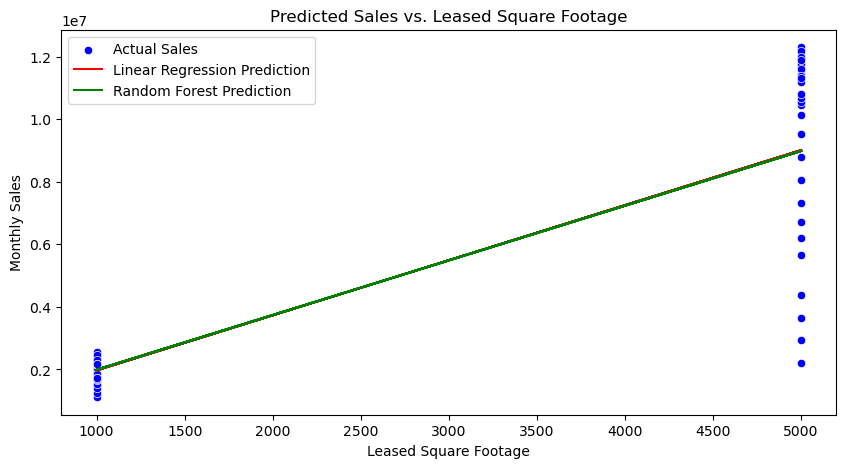

(3487476397548.0674, 3545903394099.1562, 0.8550924396689765, 0.852664749109224)

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering: Currently, we'll focus on "Leased Square Footage" as the main feature.

# Defining features and target variable
X = data['Leased Square Footage'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = data['Monthly Sales'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Visualization: Relationship between Leased Space and Sum of 12 Months Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Leased Square Footage', y='Monthly Sales', color='blue', label='Actual Sales')
plt.plot(X_test, lr_pred, color='red', label='Linear Regression Prediction')
plt.plot(X_test, rf_pred, color='green', label='Random Forest Prediction')
plt.title('Predicted Sales vs. Leased Square Footage')
plt.xlabel('Leased Square Footage')
plt.ylabel('Monthly Sales')
plt.legend()
plt.show()

(lr_mse, rf_mse, lr_r2, rf_r2)


In [4]:
# Retrieve the coefficient from the Linear Regression model
lr_coefficient = lr_model.coef_[0]

# The coefficient represents the expected change in sales (in dollars) for each additional square foot of space at Boston Mall
lr_coefficient


1758.2195179902783

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming data is already loaded and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# New location square footage
new_location_square_footage = np.array([[5000]])
# Scaling factors for different scenarios
scaling_factors = [0.6, 0.8, 1.0, 1.2]

# Base prediction for the new location
base_predicted_sales = rf_model.predict(new_location_square_footage)[0]

# Predictions and confidence intervals for each scaling factor
predictions_and_cis = {}

for factor in scaling_factors:
    # Scale the base prediction
    scaled_prediction = base_predicted_sales * factor
    
    # Bootstrap method for scaled confidence interval estimation
    bootstrap_estimates = []
    for _ in range(1000):  # Number of bootstrap samples
        indices = np.random.choice(range(len(X_train)), len(X_train), replace=True)
        X_resampled, y_resampled = X_train[indices], y_train[indices]
        model_resampled = RandomForestRegressor(n_estimators=100, random_state=42)
        model_resampled.fit(X_resampled, y_resampled)
        # Apply scaling factor to each bootstrap estimate
        bootstrap_estimates.append(model_resampled.predict(new_location_square_footage)[0] * factor)
    # Calculate the 95% confidence interval from the scaled bootstrap estimates
    confidence_interval = np.percentile(bootstrap_estimates, [2.5, 97.5])
    
    # Store results
    predictions_and_cis[f"Factor {factor}x"] = {"Prediction": scaled_prediction, "CI": confidence_interval}

# Print predictions and confidence intervals for each scenario
for scenario, details in predictions_and_cis.items():
    print(f"{scenario} - Prediction: ${details['Prediction']:.2f}")
    print(f"   95% Confidence Interval: ${details['CI'][0]:.2f} to ${details['CI'][1]:.2f}")


Factor 0.6x - Prediction: $5390270.37
   95% Confidence Interval: $4592805.60 to $6099294.30
Factor 0.8x - Prediction: $7187027.16
   95% Confidence Interval: $6173177.93 to $8137255.82
Factor 1.0x - Prediction: $8983783.95
   95% Confidence Interval: $7670076.26 to $10142714.41
Factor 1.2x - Prediction: $10780540.75
   95% Confidence Interval: $9240177.06 to $12222098.24


In [6]:
# Current and new square footage and sales information
current_square_footage = 1000
new_square_footage = 5000
current_sales = 4933333  # current sales for 1000 sq.gootage
predicted_sales_new_location = 10260231.99  # Predicted sales for the new location

# Calculate the increase in square footage and the increase in sales
increase_in_square_footage = new_square_footage - current_square_footage
increase_in_sales = predicted_sales_new_location - current_sales

# Calculate the additional dollar revenue generated per each additional square footage for the new location
additional_dollar_per_sqft_new_location = increase_in_sales / increase_in_square_footage

additional_dollar_per_sqft_new_location


1331.7247475000001